## Práctica 1
*Nombre:* Diego Fernando Valle Morales
*Carné:* 20003022

In [3]:
#pip install tensorflow

  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121936 sha256=50bbbe8fcc1e4d03f32b21a1d9e31760a8d7b9f666f557db14858a71a073bb49
  Stored in directory: C:\Users\diego\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=a6100b77b5d6a692535b210e67f3dc930aeaa7a1df7af1c1da7a1e74e963128e
  Stored in directory: C:\Users\diego\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built absl-py termcolor
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
Note: you may need to restart the kernel to use updated packages.


In [55]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%reload_ext tensorboard

print(tf.__version__)

2.2.0


In [56]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [0]:
#### 

In [31]:
datos = np.load("proyecto_training_data.npy")

datodiv, variable = datos.shape
#(datodiv, variable)
ent_datodiv = int(datodiv*0.8)
entrenaY = datos[:ent_datodiv, 0]
entrenaX = datos[:ent_datodiv, 1]
pruebaY = datos[ent_datodiv:, 0]
pruebaX = datos[ent_datodiv:, 1]
#datos.ndim
#len(datos)
#datos.itemsize 
#datos
datos.shape

(1460, 6)

A continuación después de haber definido los datasets de entrenamiento y de pruebas, se procede a declarar los placeholders que serán usados en el grafo. Usando los diferentes elementos del modelo siendo estos Y, W b y lr.

In [37]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.constant(1.), name = "W") 
b = tf.Variable(tf.constant(0.), name = "b") 
lr = tf.placeholder(tf.float32)

A continuación se procede a declarar las operaciones que se usarán en el grafo, siendo estos Yhat, cost (costo), optimizer.

In [38]:
Yhat = tf.add(tf.multiply(X, W), b) 
cost = tf.reduce_sum(tf.pow(Yhat-Y, 2)) / (2 * ent_datodiv) 
optimizador = tf.train.GradientDescentOptimizer(lr).minimize(cost) 
init = tf.global_variables_initializer() 
testSummary = tf.summary.scalar(name='Costo', tensor = cost)

Después de inicializar el grafico se procede a generar una función que sirva para entrenar el modelo.

In [45]:
logs_dir = r"C:\Users\diego\StatisticalLearning\Practica1\logs"

def entrenamientoModeloLineal(x, y, training_epochs, learning_rate, imp):
    with tf.Session() as sess: 
        writer = tf.summary.FileWriter(logs_dir, sess.graph)
        print("USANDO UN LR DE ", learning_rate, ":")
        sess.run(init) 
        for epoch in range(training_epochs): 
            for (_x, _y) in zip(x, y): 
                sess.run(optimizador, feed_dict = {X : _x, Y : _y, lr : learning_rate}) 
            if (epoch + 1) % imp == 0: 
                c = sess.run(cost, feed_dict = {X : Xtrain, Y : Ytrain}) 
                print("EPOCH ", (epoch + 1), ": Costo =", c, " \t W =", sess.run(W), "\t b =", sess.run(b)) 
            summary = sess.run(testSummary, feed_dict = {X : x, Y : y})
            writer.add_summary(summary, epoch)
        training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weight = sess.run(W) 
        bias = sess.run(b) 
        return (weight, bias, training_cost)

Ahora se procede a definir una función que ayudará a definir los gráficos dentro del modelo, esto servirá para comprender mejor que está sucediendo con los datos y con el modelo.

In [40]:
def grafica(peso, bias, costo):
    predictions = peso * entrenaX + bias 
    print("Costo =", costo, "Pendiente =", peso, "Intercepto =", bias, '\n') 
    fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(entrenaX, entrenaY, label = 'Valor Ref')
    plt.ylabel("PRECIO CASA");
    plt.plot(Xtrain, predictions, 'r', label ='Ajuste')  
    plt.legend() 
    plt.show()

Después de definir los elementos básicos que se usarán para está práctica se procede a entrenar el modelo lineal que se usará:

In [46]:
peso, bias, costo = entrenamientoModeloLineal(entrenaX, entrenaY, training_epochs=100, learning_rate=1, imp=10)

USANDO UN LR DE  1 :
EPOCH  10 : Costo = 1258214300.0  	 W = 34750.074 	 b = -34050.418
EPOCH  20 : Costo = 1195145900.0  	 W = 38613.562 	 b = -57953.074
EPOCH  30 : Costo = 1170240400.0  	 W = 41018.926 	 b = -72834.63
EPOCH  40 : Costo = 1160300800.0  	 W = 42516.504 	 b = -82099.86
EPOCH  50 : Costo = 1156270100.0  	 W = 43448.863 	 b = -87868.18
EPOCH  60 : Costo = 1154597100.0  	 W = 44029.336 	 b = -91459.49
EPOCH  70 : Costo = 1153879600.0  	 W = 44390.688 	 b = -93695.04
EPOCH  80 : Costo = 1153558700.0  	 W = 44615.69 	 b = -95087.14
EPOCH  90 : Costo = 1153407400.0  	 W = 44755.746 	 b = -95953.664
EPOCH  100 : Costo = 1153332100.0  	 W = 44842.973 	 b = -96493.24


Costo = 1153332100.0 Pendiente = 44842.973 Intercepto = -96493.24 



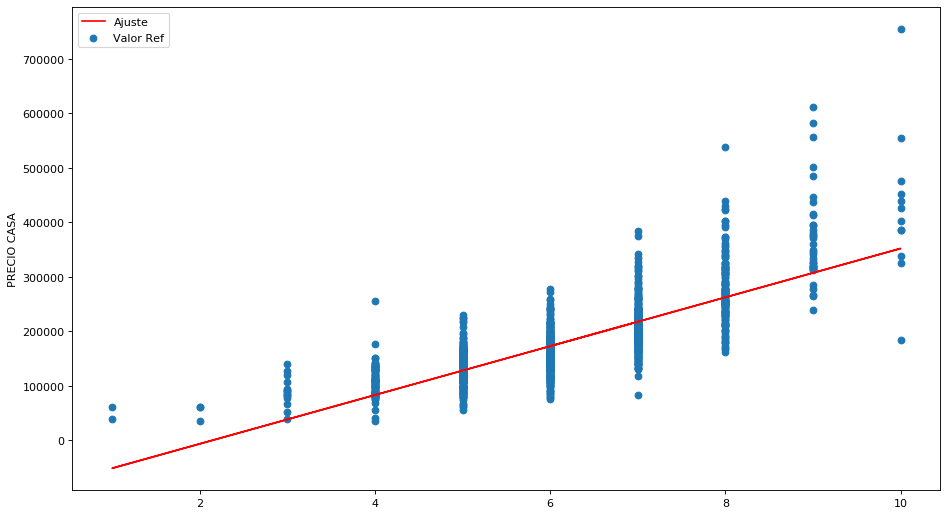

In [50]:
grafica(peso, bias, costo)

In [59]:
peso1, bias1, costo1 = entrenamientoModeloLineal(entrenaX, entrenaY, training_epochs=100, learning_rate=0.1, imp=10)

USANDO UN LR DE  0.1 :
EPOCH  10 : Costo = 1376766000.0  	 W = 29891.785 	 b = -144.23007
EPOCH  20 : Costo = 1356206800.0  	 W = 30597.56 	 b = -4609.899
EPOCH  30 : Costo = 1337503100.0  	 W = 31270.695 	 b = -8868.977
EPOCH  40 : Costo = 1320487800.0  	 W = 31912.664 	 b = -12931.066
EPOCH  50 : Costo = 1305007900.0  	 W = 32524.936 	 b = -16805.219
EPOCH  60 : Costo = 1290923900.0  	 W = 33108.91 	 b = -20500.09
EPOCH  70 : Costo = 1278110300.0  	 W = 33665.875 	 b = -24024.12
EPOCH  80 : Costo = 1266453400.0  	 W = 34197.05 	 b = -27385.158
EPOCH  90 : Costo = 1255847700.0  	 W = 34703.676 	 b = -30590.771
EPOCH  100 : Costo = 1246198500.0  	 W = 35186.84 	 b = -33648.05


Costo = 1246198500.0 Pendiente = 35186.84 Intercepto = -33648.05 



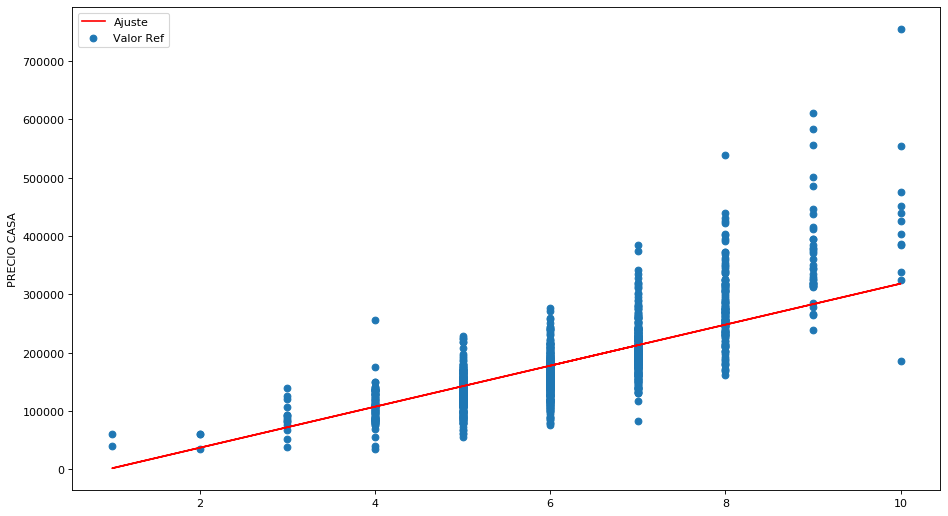

In [60]:
grafica(peso1, bias1, costo1)

In [57]:
peso01, bias01, costo01 = entrenamientoModeloLineal(entrenaX, entrenaY, training_epochs=100, learning_rate=0.01, imp=10)

USANDO UN LR DE  0.01 :
EPOCH  10 : Costo = 1399140100.0  	 W = 29128.955 	 b = 4054.8171
EPOCH  20 : Costo = 1390137000.0  	 W = 29731.145 	 b = 3661.7144
EPOCH  30 : Costo = 1387828400.0  	 W = 29814.662 	 b = 3190.0156
EPOCH  40 : Costo = 1385556500.0  	 W = 29888.486 	 b = 2719.083
EPOCH  50 : Costo = 1383306800.0  	 W = 29961.75 	 b = 2250.3435
EPOCH  60 : Costo = 1381077900.0  	 W = 30034.656 	 b = 1783.8136
EPOCH  70 : Costo = 1378870100.0  	 W = 30107.201 	 b = 1319.4915
EPOCH  80 : Costo = 1376683300.0  	 W = 30179.459 	 b = 857.363
EPOCH  90 : Costo = 1374517000.0  	 W = 30251.371 	 b = 397.42032
EPOCH  100 : Costo = 1372371000.0  	 W = 30322.936 	 b = -60.347836


Costo = 1372371000.0 Pendiente = 30322.936 Intercepto = -60.347836 



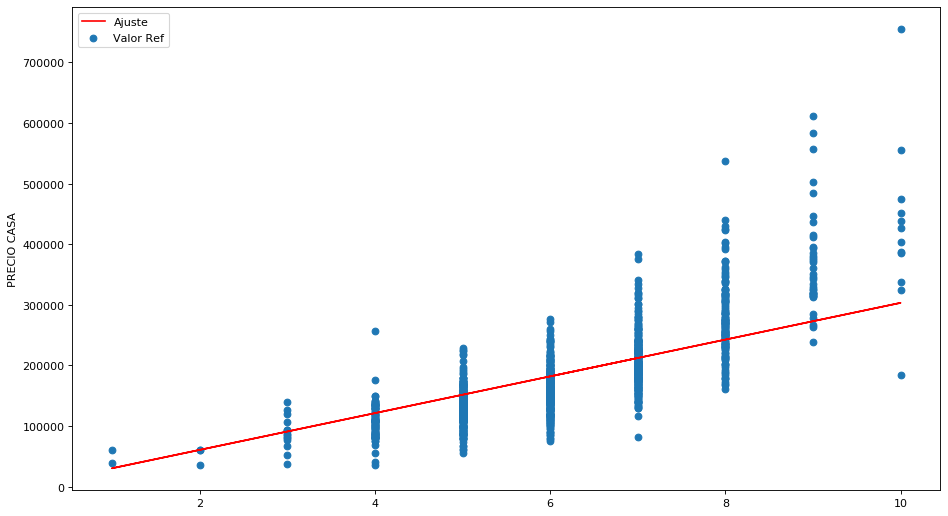

In [58]:
grafica(peso01, bias01, costo01)

In [61]:
peso001, bias001, costo001 = entrenamientoModeloLineal(entrenaX, entrenaY, training_epochs=100, learning_rate=0.001, imp=10)

USANDO UN LR DE  0.001 :
EPOCH  10 : Costo = 9477633000.0  	 W = 9788.876 	 b = 1479.1666
EPOCH  20 : Costo = 5021543400.0  	 W = 16347.494 	 b = 2454.1812
EPOCH  30 : Costo = 3021892900.0  	 W = 20743.13 	 b = 3091.4978
EPOCH  40 : Costo = 2124453400.0  	 W = 23689.904 	 b = 3502.629
EPOCH  50 : Costo = 1721591000.0  	 W = 25666.143 	 b = 3762.2644
EPOCH  60 : Costo = 1540637000.0  	 W = 26992.445 	 b = 3920.4265
EPOCH  70 : Costo = 1459287400.0  	 W = 27883.234 	 b = 4010.6387
EPOCH  80 : Costo = 1422633200.0  	 W = 28482.36 	 b = 4055.3208
EPOCH  90 : Costo = 1406041100.0  	 W = 28886.137 	 b = 4069.5227
EPOCH  100 : Costo = 1398455200.0  	 W = 29159.107 	 b = 4063.3013


Costo = 1372371000.0 Pendiente = 30322.936 Intercepto = -60.347836 



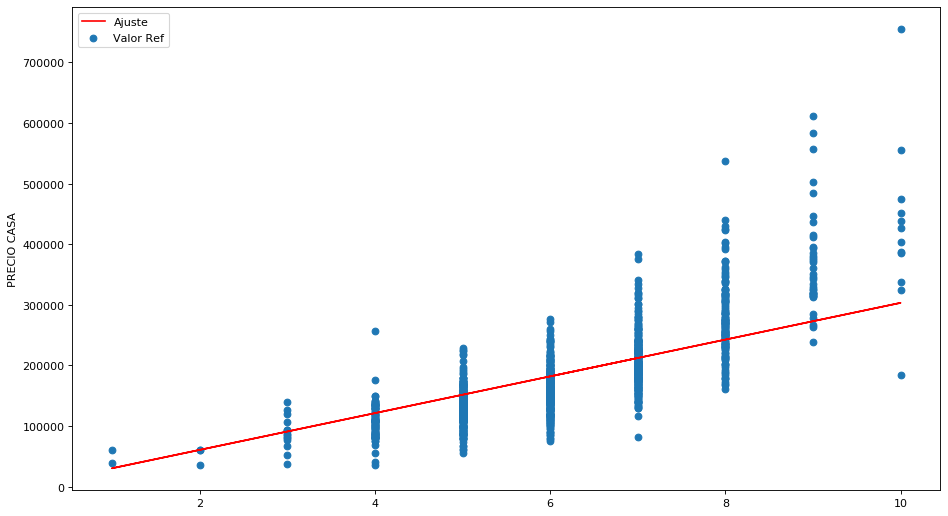

In [62]:
grafica(peso01, bias01, costo01)

Después de entrenar el modelo tenemos varias posibilidades, como se puede observar al momento de que se aumenta la precisión del _learning rate_ el modelo se va aplanando con el horizonte y pierde su efectividad.

In [64]:
%tensorboard --logdir="C:\Users\diego\StatisticalLearning\Practica1\logs"

Reusing TensorBoard on port 6006 (pid 55188), started 0:24:38 ago. (Use '!kill 55188' to kill it.)

En caso no aparezca la implementación del Tensorboard, se coloca a continuación la imagen:
![GraficaGenerada](TensorBoard.jpg)

También se coloca a continuación imagen del grafo:
![Grafo](grafo.jpg)